In [17]:
import os; print(os.getcwd())

c:\Users\Eridas\Documents\vilniuscoding2024\git\DataScienceNotebooks\Studentai\MykolasOK


In [1]:
# You will find the following 4 files:
# b2b_gv_vartojimas.xlsx - B2B prosumers
# b2b_ngv_vartojimas.xlsx - B2B consumers
# b2c_gv_vartojimas.xlsx - B2C prosumers
# b2c_ngv_vartojimas.xlsx - B2C consumers
# The goal is to create the most accurate models to predict the next day's (D-1) electricity consumption (24 values). 
# You should create a model that makes the forecast of each hour for the next day at 11:00 a.m. of the current day, because that's 
# how the market works - by 11:00 a.m. you need to provide the Nordpool operator with the volumes of electricity (and prices, but it 
# doesn't matter in this case) that you want to buy every hour the next day.

# An additional task is to create a classifier that allows to classify users as accurately as possible according to their electricity consumption data: 
# 4 classes according to the names of the excel files.

In [42]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
b2b_gv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2b_gv_vartojimas.xlsx')

In [33]:
b2b_ngv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2b_ngv_vartojimas.xlsx')

In [34]:
b2c_gv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2c_gv_vartojimas.xlsx')

In [35]:
b2c_ngv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2c_ngv_vartojimas.xlsx')

In [ ]:
b2b_gv

In [27]:
# pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [39]:
b2b_gv_learn = b2b_gv[:-48] ; b2b_gv_learn
b2b_ngv_learn = b2b_ngv[:-48] ; b2b_ngv_learn
b2c_gv_learn = b2c_gv[:-24] ; b2c_gv_learn
b2c_ngv_learn = b2c_ngv[:-24] ; b2c_ngv_learn

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
0,2023-08-01 00:00:00,0.117,0.103,0.041,0.070,0.126,0.048,0.131,0.171,0.347,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
1,2023-08-01 01:00:00,0.501,0.043,0.046,0.120,0.104,0.051,0.110,0.210,0.963,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
2,2023-08-01 02:00:00,0.185,0.052,0.046,0.145,0.066,0.047,0.110,0.195,0.574,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
3,2023-08-01 03:00:00,0.107,0.050,0.045,0.067,0.127,0.049,0.104,0.145,0.429,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
4,2023-08-01 04:00:00,0.118,0.037,0.041,0.124,0.198,0.046,0.179,0.185,0.397,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,2023-10-29 20:00:00,0.388,0.224,0.042,0.627,0.149,0.268,0.197,0.183,0.991,...,0.148,0.224,1.422,0.142,0.377,0.249,0.210,0.298,0.0,0.0
2157,2023-10-29 21:00:00,0.437,0.291,0.042,0.270,0.151,0.268,0.108,0.180,0.942,...,0.115,0.246,0.535,0.108,0.317,0.171,0.171,0.139,0.0,0.0
2158,2023-10-29 22:00:00,0.561,0.229,0.144,0.191,0.188,0.262,0.089,0.186,0.408,...,0.109,0.155,0.756,0.120,0.159,0.151,0.120,0.226,0.0,0.0
2159,2023-10-29 23:00:00,0.453,0.246,0.195,0.103,0.127,0.552,0.114,0.214,0.938,...,0.094,0.088,0.423,0.100,0.114,0.157,0.105,0.079,0.0,0.0


In [43]:
b2b_gv_learn['month'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.month
b2b_gv_learn['week'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.weekday
b2b_gv_learn['day'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.day
b2b_gv_learn['hour'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.hour
b2b_ngv_learn['month'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.month
b2b_ngv_learn['week'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.weekday
b2b_ngv_learn['day'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.day
b2b_ngv_learn['hour'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.hour
b2c_gv_learn['month'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.month
b2c_gv_learn['week'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.weekday
b2c_gv_learn['day'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.day
b2c_gv_learn['hour'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.hour
b2c_ngv_learn['month'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.month
b2c_ngv_learn['week'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.weekday
b2c_ngv_learn['day'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.day
b2c_ngv_learn['hour'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.hour

In [84]:
datefrom = datetime(2023,9,1,0)
dateto = datetime(2023,10,30,0)
b2b_gv_learn_filtered = b2b_gv_learn.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_learn_filtered = b2b_ngv_learn.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_learn_filtered = b2c_gv_learn.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_learn_filtered = b2c_ngv_learn.query('dateTime > @datefrom & dateTime < @dateto')

In [85]:
columns_to_sum_b2bgv = b2b_gv_learn_filtered.drop(columns=['data_valanda', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2bngv = b2b_ngv_learn_filtered.drop(columns=['data_valanda', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2cgv = b2c_gv_learn_filtered.drop(columns=['dateTime', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2cngv = b2c_ngv_learn_filtered.drop(columns=['dateTime', 'month', 'week', 'day', 'hour']).columns


In [86]:
b2b_gv_learn_filtered['viso'] = b2b_gv_learn_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_learn_filtered['viso'] = b2b_ngv_learn_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_learn_filtered['viso'] = b2c_gv_learn_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_learn_filtered['viso'] = b2c_ngv_learn_filtered[columns_to_sum_b2cngv].sum(axis=1)

In [27]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [87]:
X_b2bgv = b2b_gv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2bgv = b2b_gv_learn_filtered['viso']
X_b2bngv = b2b_ngv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2bngv = b2b_ngv_learn_filtered['viso']
X_b2cgv = b2c_gv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2cgv = b2c_gv_learn_filtered['viso']
X_b2cngv = b2c_ngv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2cngv = b2c_ngv_learn_filtered['viso']

In [88]:
X_train_b2bgv, X_test_b2bgv, y_train_b2bgv, y_test_b2bgv = train_test_split(X_b2bgv, y_b2bgv, test_size=0.20, random_state=23)
X_train_b2bngv, X_test_b2bngv, y_train_b2bngv, y_test_b2bngv = train_test_split(X_b2bngv, y_b2bngv, test_size=0.20, random_state=23)
X_train_b2cgv, X_test_b2cgv, y_train_b2cgv, y_test_b2cgv = train_test_split(X_b2cgv, y_b2cgv, test_size=0.20, random_state=23)
X_train_b2cngv, X_test_b2cngv, y_train_b2cngv, y_test_b2cngv = train_test_split(X_b2cngv, y_b2cngv, test_size=0.20, random_state=23)

In [89]:
linear_b2bgv = LinearRegression().fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = linear_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv linijinės vertinimas: {linear_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
linear_b2bngv = LinearRegression().fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = linear_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv linijinės vertinimas: {linear_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
linear_b2cgv = LinearRegression().fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = linear_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv linijinės vertinimas: {linear_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
linear_b2cngv = LinearRegression().fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = linear_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv linijinės vertinimas: {linear_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv linijinės vertinimas: 28.806417704626607
b2b_ngv linijinės vertinimas: 13.061907180281796
b2c_gv linijinės vertinimas: 45.60023124526309
b2c_ngv linijinės vertinimas: 59.533872878754465


In [90]:
decision_b2bgv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = decision_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv Decision tree vertinimas: {decision_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
decision_b2bngv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = decision_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv Decision tree vertinimas: {decision_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
decision_b2cgv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = decision_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv Decision tree vertinimas: {decision_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
decision_b2cngv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = decision_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv Decision tree vertinimas: {decision_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv Decision tree vertinimas: 96.54934403117102
b2b_ngv Decision tree vertinimas: 97.14862474216763
b2c_gv Decision tree vertinimas: 95.95151760160127
b2c_ngv Decision tree vertinimas: 96.75243572132386


In [26]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)*100.0

94.89045483995227

In [ ]:
# Iki čia padaryta

In [91]:
random_b2bgv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = random_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv Random forest vertinimas: {random_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
random_b2bngv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = random_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv Random forest vertinimas: {random_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
random_b2cgv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = random_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv Random forest vertinimas: {random_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
random_b2cngv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = random_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv Random forest vertinimas: {random_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv Random forest vertinimas: 96.97281059627507
b2b_ngv Random forest vertinimas: 98.50367503461379
b2c_gv Random forest vertinimas: 97.71742680121214
b2c_ngv Random forest vertinimas: 98.18673187376096


In [31]:
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)*100.0

96.95266575937018

In [109]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Funkcija, kuri sukuria datetime intervalą
def generate_datetime_range(start, end, freq='H'):
    """
    Sukuria datetime objektų intervalą nuo `start` iki `end` su nurodytu dažniu.
    
    :param start: Pradžios data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param end: Pabaigos data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param freq: Dažnis (pvz., 'H' - valandoms, 'D' - dienoms).
    :return: Pandas DataFrame su datetime objektu ir išskirtais 'month', 'week', 'day', 'hour'.
    """
    date_range = pd.date_range(start=start, end=end, freq=freq)
    df = pd.DataFrame({'datetime': date_range})
    df['month'] = df['datetime'].dt.month
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df

start_date = '2023-10-30 01:00'
end_date = '2023-10-31 00:00'

b2bgv = generate_datetime_range(start=start_date, end=end_date)
b2bngv = generate_datetime_range(start=start_date, end=end_date)
b2cgv = generate_datetime_range(start=start_date, end=end_date)
b2cngv = generate_datetime_range(start=start_date, end=end_date)

X_b2bgv = b2bgv[['month', 'week', 'day', 'hour']] 
X_b2bngv = b2bngv[['month', 'week', 'day', 'hour']]
X_b2cgv = b2cgv[['month', 'week', 'day', 'hour']]
X_b2cngv = b2cngv[['month', 'week', 'day', 'hour']] 


b2bgv['linear'] = linear_b2bgv.predict(X_b2bgv)
b2bngv['linear'] = linear_b2bngv.predict(X_b2bngv)
b2cgv['linear'] = linear_b2cgv.predict(X_b2cgv)
b2cngv['linear'] = linear_b2cngv.predict(X_b2cngv)

b2bgv['decision_tree'] = decision_b2bgv.predict(X_b2bgv)
b2bngv['decision_tree'] = decision_b2bngv.predict(X_b2bngv)
b2cgv['decision_tree'] = decision_b2cgv.predict(X_b2cgv)
b2cngv['decision_tree'] = decision_b2cngv.predict(X_b2cngv)

b2bgv['random_frorest'] = random_b2bgv.predict(X_b2bgv)
b2bngv['random_frorest'] = random_b2bngv.predict(X_b2bngv)
b2cgv['random_frorest'] = random_b2cgv.predict(X_b2cgv)
b2cngv['random_frorest'] = random_b2cngv.predict(X_b2cngv)




In [110]:
datefrom = datetime(2023,10,30,1)
dateto = datetime(2023,10,31,0)
b2b_gv_merge = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_merge = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_merge = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_merge = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

In [111]:
columns_to_sum_b2bgv = b2b_gv_merge.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_merge.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_merge.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_merge.drop(columns=['dateTime']).columns

In [112]:
b2b_gv_merge['faktas'] = b2b_gv_merge[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_merge['faktas'] = b2b_ngv_merge[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_merge['faktas'] = b2c_gv_merge[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_merge['faktas'] = b2c_ngv_merge[columns_to_sum_b2cngv].sum(axis=1)

In [113]:
b2b_gv_merge['datetime'] = b2b_gv_merge['data_valanda']
b2b_ngv_merge['datetime'] = b2b_ngv_merge['data_valanda']
b2c_gv_merge['datetime'] = b2c_gv_merge['dateTime']
b2c_ngv_merge['datetime'] = b2c_ngv_merge['dateTime']

In [114]:
b2b_gv_merge = b2b_gv_merge[['datetime', 'faktas']]
b2b_ngv_merge = b2b_ngv_merge[['datetime', 'faktas']]
b2c_gv_merge = b2c_gv_merge[['datetime', 'faktas']]
b2c_ngv_merge = b2c_ngv_merge[['datetime', 'faktas']]

In [115]:
b2bgv = pd.merge(b2bgv,b2b_gv_merge, on='datetime')
b2bngv = pd.merge(b2bngv,b2b_ngv_merge, on='datetime')
b2cgv = pd.merge(b2cgv,b2c_gv_merge, on='datetime')
b2cngv = pd.merge(b2cngv,b2c_ngv_merge, on='datetime')

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
b2bgv = b2bgv.drop(columns=['month', 'week', 'day', 'hour'])
b2bngv = b2bngv.drop(columns=['month', 'week', 'day', 'hour'])
b2cgv = b2cgv.drop(columns=['month', 'week', 'day', 'hour'])
b2cngv = b2cngv.drop(columns=['month', 'week', 'day', 'hour'])

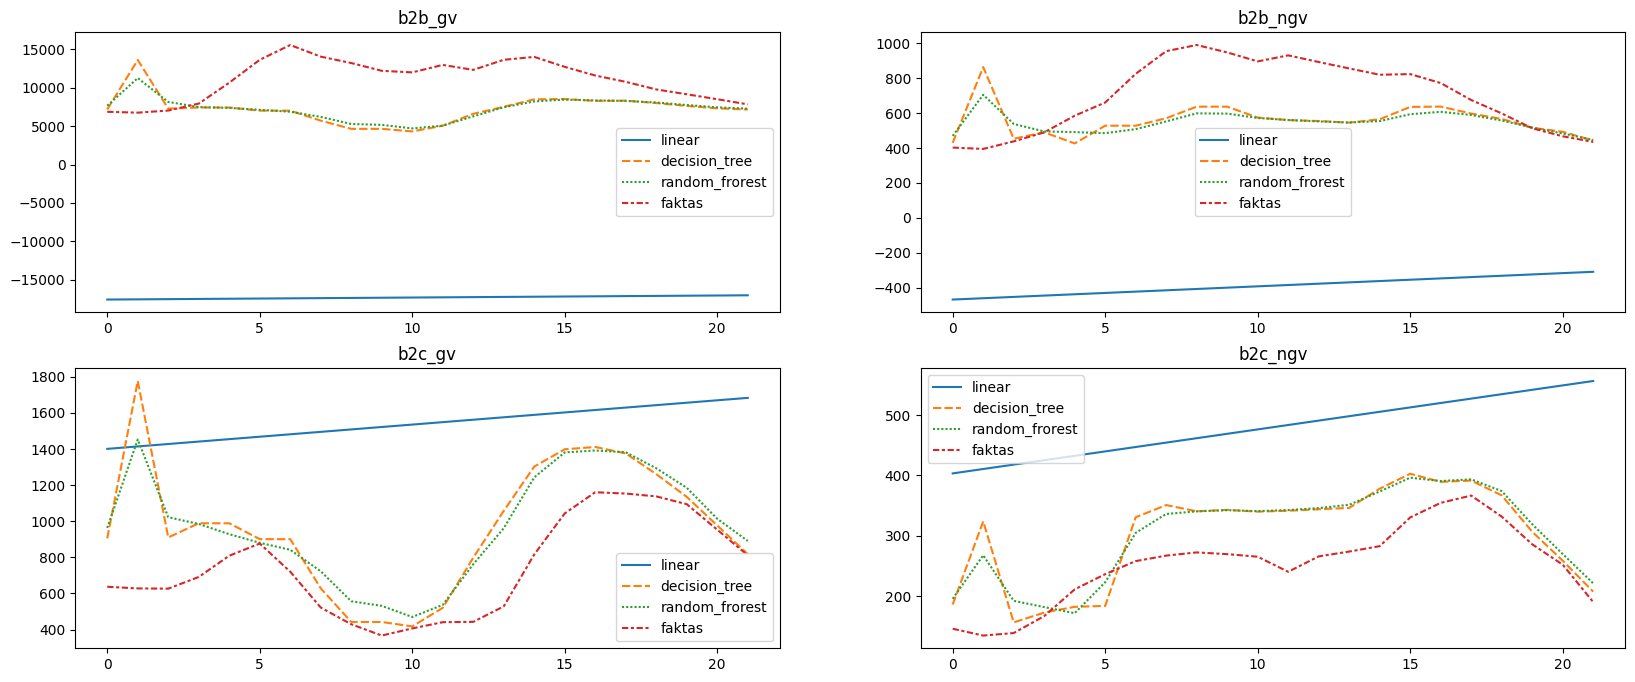

In [118]:
fig, axes = plt.subplots(2,2,figsize=(20,8))
axes[0,0].set_title(f'b2b_gv')
sns.lineplot(data=b2bgv,ax=axes[0,0])
axes[0,1].set_title(f'b2b_ngv')
sns.lineplot(data=b2bngv,ax=axes[0,1])
axes[1,0].set_title(f'b2c_gv')
sns.lineplot(data=b2cgv,ax=axes[1,0])
axes[1,1].set_title(f'b2c_ngv')
sns.lineplot(data=b2cngv,ax=axes[1,1])
plt.show()

In [ ]:
# Projektas
# Elektros energijos suvartojimo prognozė, atsižvelgiant į oro sąlygas
# Užduotis:
# Sukurti ir pateikti modelius, skirtus prognozuoti elektros energijos suvartojimą 24-rioms valandoms į
# priekį, atsižvelgiant į (prognozuojamas) oro sąlygas. Modeliams pateikus tikėtinas ateities oro sąlygas,
# modeliai turi pateikti 24-rių valandų energijos poreikio įvertinimą. Pradiniai testiniai duomenys: bet kuri
# diena tarp 2023-čių rugpjūčio 01 ir spalio 30-tos dienos. Vėliau išbandykite suprognozuoti elektros
# vartojimą realiai sekančiai dienai, ir palyginkite su Nordpool duomenimsi.prognoze.
# Istoriniai orų duomenys pasiekiami čia: https://archyvas.meteo.lt/
# Bendras LT energijos suvartojimas kas valandą pasiekiamas čia:
# https://data.nordpoolgroup.com/auction/day-ahead/volumes?deliveryDate=2025-01-
# 09&deliveryAreas=LT,AT
# Prognozuojami orai pasiekiami per meteo.lt API.
# Pritaikykite DecisionTreeRegressor, Linear, ectorMachinSupportVe, RandomForestRegressor.
# Papildomas punktas : SupportVectorMachine palaiko skirtingus kernel’ius duomenų fitinimui – linear,

# poly, rbf. Plačiau čia: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-
# linear-kernels-in-scikit-learn/

# Išrinkite geriausią kernel’į SVR modeliui ir SVR modelio prognozes pateikite tik su geriausiu kernel’iu.
# Prieš pateikdami modelius, nustatykite, kokie parametrai turi daugiausiai įtakos prognozei (hint –
# koreliacijos matrica ir heatmap vizualizacija). Su pairplot pateikite atsirinktų parametrų tarpusavio
# priklausomybes.
# Pateikdami modelių prognozes, arba ieškodami geriausio modelio, geriausio kernel’io, taip pat pateikite
# jų įvertinimus (vidurkiai, standartiniai nuokrypiai, etc ... ).
# Pateikite modelių prognozes vizualizuodami jas.
# Papildomi reikalavimai:
# Sugeneruoti grafikai (vizualizacijos) turi būti automatiškai saugomi į projekto aplanką bei automatiškai
# dedami į docx failą.
# Matplotlib’o figūra gali būti saugojama į PNG su komanda .savefig().
# Plačiau čia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Docx failo generavimas https://python-docx.readthedocs.io/en/latest/
# Duotoje nuorodoje pateikiamas minimalus veikiantis pavyzdys, kuriame sukuriamas Word docx
# dokumentas, į jį įterpiamas tekstas, paveikslai.
# https://data.nordpoolgroup.com/power-system/consumption?deliveryDate=2025-01-09&deliveryAreas=AT&aggregation=DeliveryPeriod

In [150]:
datefrom = datetime(2023,7,31,23)
dateto = datetime(2023,10,30,0)
b2b_gv_filtered = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_filtered = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_filtered = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_filtered = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

In [151]:
columns_to_sum_b2bgv = b2b_gv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_filtered.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_filtered.drop(columns=['dateTime']).columns

In [152]:
b2b_gv_filtered['b2b_gv'] = b2b_gv_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_filtered['b2b_ngv'] = b2b_ngv_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_filtered['b2c_gv'] = b2c_gv_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_filtered['b2c_ngv'] = b2c_ngv_filtered[columns_to_sum_b2cngv].sum(axis=1)

In [153]:
b2b_gv_filtered['datetime'] = b2b_gv_filtered['data_valanda']
b2b_ngv_filtered['datetime'] = b2b_ngv_filtered['data_valanda']
b2c_gv_filtered['datetime'] = b2c_gv_filtered['dateTime']
b2c_ngv_filtered['datetime'] = b2c_ngv_filtered['dateTime']

In [154]:
b2b_gv_filtered = b2b_gv_filtered[['datetime', 'b2b_gv']]
b2b_ngv_filtered = b2b_ngv_filtered[['datetime', 'b2b_ngv']]
b2c_gv_filtered = b2c_gv_filtered[['datetime', 'b2c_gv']]
b2c_ngv_filtered = b2c_ngv_filtered[['datetime', 'b2c_ngv']]

In [243]:
gam_vart = pd.merge(b2b_gv_filtered,b2c_gv_filtered, on='datetime')
neg_vart = pd.merge(b2b_ngv_filtered,b2c_ngv_filtered, on='datetime')

In [137]:
gam_vart.columns

Index(['datetime', 'b2b_gv', 'b2c_gv'], dtype='object')

In [138]:
neg_vart.columns

Index(['datetime', 'b2b_ngv', 'b2c_ngv'], dtype='object')

In [244]:
gam_vart['Gaminantys'] = gam_vart[['b2b_gv', 'b2c_gv']].sum(axis=1)
neg_vart['Negaminantys'] = neg_vart[['b2b_ngv', 'b2c_ngv']].sum(axis=1)

In [245]:
gam_vart = gam_vart[['datetime','Gaminantys']]
neg_vart = neg_vart[['datetime','Negaminantys']]
df_for_learn = pd.merge(gam_vart,neg_vart, on='datetime')

In [246]:
df_for_learn['month'] = pd.to_datetime(df_for_learn['datetime']).dt.month
df_for_learn['week'] = pd.to_datetime(df_for_learn['datetime']).dt.weekday
df_for_learn['hour'] = pd.to_datetime(df_for_learn['datetime']).dt.hour

In [247]:
orai = pd.read_json('../../../weather_data_vilnius.json')

In [248]:
orai['datetime'] = pd.to_datetime(orai['obs_time_utc'])

In [164]:
orai

,obs_time_utc,station_code,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code,datetime
0,2023-08-01 00:00:00,vilniaus-ams,14.8,14.8,2.1,3.2,165,25.0,1007.7,82,0.0,partly-cloudy,2023-08-01 00:00:00
1,2023-08-01 01:00:00,vilniaus-ams,13.8,13.8,1.5,2.6,150,25.0,1008.0,87,0.0,partly-cloudy,2023-08-01 01:00:00
2,2023-08-01 02:00:00,vilniaus-ams,13.6,13.6,1.7,2.8,142,50.0,1007.6,86,0.0,variable-cloudiness,2023-08-01 02:00:00
3,2023-08-01 03:00:00,vilniaus-ams,13.5,13.5,1.3,2.8,146,100.0,1007.5,87,0.0,cloudy,2023-08-01 03:00:00
4,2023-08-01 04:00:00,vilniaus-ams,15.0,15.0,1.6,2.9,142,0.0,1007.0,82,0.0,clear,2023-08-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2023-10-31 19:00:00,vilniaus-ams,14.2,14.2,4.3,10.7,203,100.0,998.9,74,0.0,cloudy,2023-10-31 19:00:00
2204,2023-10-31 20:00:00,vilniaus-ams,13.7,13.7,3.6,7.0,191,100.0,999.1,79,0.0,cloudy,2023-10-31 20:00:00
2205,2023-10-31 21:00:00,vilniaus-ams,13.4,13.4,2.7,7.2,201,100.0,998.9,83,0.0,cloudy,2023-10-31 21:00:00
2206,2023-10-31 22:00:00,vilniaus-ams,12.1,12.1,2.2,4.7,188,88.0,998.8,88,0.0,cloudy,2023-10-31 22:00:00


In [249]:
orai_for_merge = orai[['datetime', 'air_temperature', 'wind_speed', 'cloud_cover']]

In [250]:
orai_for_merge = orai_for_merge.dropna(subset=['cloud_cover'])

In [220]:
orai_for_merge

,datetime,air_temperature,wind_speed,cloud_cover,cloud_coveris
0,2023-08-01 00:00:00,14.8,2.1,25.0,25.0
1,2023-08-01 01:00:00,13.8,1.5,25.0,25.0
2,2023-08-01 02:00:00,13.6,1.7,50.0,50.0
3,2023-08-01 03:00:00,13.5,1.3,100.0,100.0
4,2023-08-01 04:00:00,15.0,1.6,0.0,0.0
...,...,...,...,...,...
2203,2023-10-31 19:00:00,14.2,4.3,100.0,100.0
2204,2023-10-31 20:00:00,13.7,3.6,100.0,100.0
2205,2023-10-31 21:00:00,13.4,2.7,100.0,100.0
2206,2023-10-31 22:00:00,12.1,2.2,88.0,88.0


In [276]:
df_learn = pd.merge(df_for_learn,orai_for_merge, on='datetime')

In [252]:
df_learn

,datetime,Gaminantys,Negaminantys,month,week,hour,air_temperature,wind_speed,cloud_cover
0,2023-08-01 00:00:00,7017.462790,510.759334,8,1,0,14.8,2.1,25.0
1,2023-08-01 01:00:00,6830.855757,469.344333,8,1,1,13.8,1.5,25.0
2,2023-08-01 02:00:00,6681.877246,432.295334,8,1,2,13.6,1.7,50.0
3,2023-08-01 03:00:00,6604.817630,420.801000,8,1,3,13.5,1.3,100.0
4,2023-08-01 04:00:00,6875.745963,422.349333,8,1,4,15.0,1.6,0.0
...,...,...,...,...,...,...,...,...,...
2135,2023-10-29 19:00:00,9693.188468,988.985812,10,6,19,2.7,4.6,100.0
2136,2023-10-29 20:00:00,9270.997265,933.634510,10,6,20,4.2,5.6,100.0
2137,2023-10-29 21:00:00,8770.581333,823.117711,10,6,21,5.1,5.1,100.0
2138,2023-10-29 22:00:00,8294.118999,751.613663,10,6,22,6.0,5.0,100.0


In [277]:
X_gam = df_learn.drop(columns=['datetime', 'Gaminantys', 'Negaminantys'])
y_gam = df_learn['Gaminantys']
X_neg = df_learn.drop(columns=['datetime', 'Gaminantys', 'Negaminantys'])
y_neg = df_learn['Negaminantys']

In [278]:
df_learn

,datetime,Gaminantys,Negaminantys,month,week,hour,air_temperature,wind_speed,cloud_cover
0,2023-08-01 00:00:00,7017.462790,510.759334,8,1,0,14.8,2.1,25.0
1,2023-08-01 01:00:00,6830.855757,469.344333,8,1,1,13.8,1.5,25.0
2,2023-08-01 02:00:00,6681.877246,432.295334,8,1,2,13.6,1.7,50.0
3,2023-08-01 03:00:00,6604.817630,420.801000,8,1,3,13.5,1.3,100.0
4,2023-08-01 04:00:00,6875.745963,422.349333,8,1,4,15.0,1.6,0.0
...,...,...,...,...,...,...,...,...,...
2135,2023-10-29 19:00:00,9693.188468,988.985812,10,6,19,2.7,4.6,100.0
2136,2023-10-29 20:00:00,9270.997265,933.634510,10,6,20,4.2,5.6,100.0
2137,2023-10-29 21:00:00,8770.581333,823.117711,10,6,21,5.1,5.1,100.0
2138,2023-10-29 22:00:00,8294.118999,751.613663,10,6,22,6.0,5.0,100.0


In [279]:
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.20, random_state=23)
X_train_gam, X_test_gam, y_train_gam, y_test_gam = train_test_split(X_gam, y_gam, test_size=0.20, random_state=23)

In [280]:
decision_gam = DecisionTreeRegressor(random_state = 0).fit(X_train_gam, y_train_gam)
pred_gam = decision_gam.predict(X_test_gam)
print(f'Gaminančių vartotojų Decision tree vertinimas: {decision_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
decision_neg = DecisionTreeRegressor(random_state = 0).fit(X_train_neg, y_train_neg)
pred_neg = decision_neg.predict(X_test_neg)
print(f'Negaminančių vartotojų Decision tree vertinimas: {decision_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')

Gaminančių vartotojų Decision tree vertinimas: 96.54934403117102
Negaminančių vartotojų Decision tree vertinimas: 97.14862474216763


In [281]:
from sklearn import svm
sv_gam = svm.SVR(kernel='linear')
sv_gam.fit(X_train_gam, y_train_gam)
pred_gam = sv_gam.predict(X_test_gam)
accuracy = sv_gam.score(X_test_gam, pred_gam)
print("Gaminančių vartotojų SVM linear", accuracy)
sv_neg = svm.SVR(kernel='linear').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam.predict(X_test_neg)
accuracy = sv_gam.score(X_test_neg, pred_neg)
print("Negaminančių vartotojų SVM linear", accuracy)

Gaminančių vartotojų SVM linear 1.0
Negaminančių vartotojų SVM linear 1.0


In [282]:
from sklearn import svm
sv_gam_poly = svm.SVR(kernel='poly').fit(X_train_gam, y_train_gam)
pred_gam = sv_gam_poly.predict(X_test_gam)
accuracy = sv_gam_poly.score(X_test_gam, pred_gam)
print("Gaminančių vartotojų SVM Poly", accuracy)
sv_neg_poly = svm.SVR(kernel='poly').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam_poly.predict(X_test_neg)
accuracy = sv_gam_poly.score(X_test_neg, pred_neg)
print("Negaminančių vartotojų SVM Poly", accuracy)

Gaminančių vartotojų SVM Poly 1.0
Negaminančių vartotojų SVM Poly 1.0


In [283]:
from sklearn import svm
sv_gam_rbf = svm.SVR(kernel='rbf').fit(X_train_gam, y_train_gam)
pred_gam = sv_gam_poly.predict(X_test_gam)
accuracy = sv_gam_poly.score(X_test_gam, pred_gam)
print("Gaminančių vartotojų SVM rbf", accuracy)
sv_neg_rbf = svm.SVR(kernel='rbf').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam_poly.predict(X_test_neg)
accuracy = sv_gam_poly.score(X_test_neg, pred_neg)
print("Negaminančių vartotojų SVM rbf", accuracy)

Gaminančių vartotojų SVM rbf 1.0
Negaminančių vartotojų SVM rbf 1.0


In [284]:
random_gam = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_gam, y_train_gam)
pred_gam = random_gam.predict(X_test_gam)
print(f'Gaminančių vartotojų Random forest vertinimas: {random_gam.score(X_test_gam, y_test_gam)*100.0}')
random_neg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_neg, y_train_neg)
pred_neg = random_neg.predict(X_test_neg)
print(f'Negaminančių vartotojų Random forest vertinimas: {random_neg.score(X_test_neg, y_test_neg)*100.0}')

Gaminančių vartotojų Random forest vertinimas: 88.68038311077038
Negaminančių vartotojų Random forest vertinimas: 97.25361213506496


In [285]:
linear_gam = LinearRegression().fit(X_train_gam, y_train_gam)
pred_gam = linear_gam.predict(X_test_gam)
print(f'Gaminančių vartotojų linijinės vertinimas: {linear_gam.score(X_test_gam, y_test_gam)*100.0}')
linear_neg = LinearRegression().fit(X_train_neg, y_train_neg)
pred_neg = linear_neg.predict(X_test_neg)
print(f'Negaminančių vartotojų linijinės vertinimas: {linear_neg.score(X_test_neg, y_test_neg)*100.0}')

Gaminančių vartotojų linijinės vertinimas: 30.573025488301553
Negaminančių vartotojų linijinės vertinimas: 36.48219540059604


In [288]:
start_date = '2023-10-30 00:00'
end_date = '2023-10-30 23:00'

gaminantys = generate_datetime_range(start=start_date, end=end_date)
negaminantys = generate_datetime_range(start=start_date, end=end_date)

gaminantys = pd.merge(gaminantys,orai_for_merge, on='datetime')
negaminantys = pd.merge(negaminantys,orai_for_merge, on='datetime')

# X_b2bgv = b2bgv[['month', 'week', 'day', 'hour']] 
# X_b2bngv = b2bngv[['month', 'week', 'day', 'hour']]
# X_b2cgv = b2cgv[['month', 'week', 'day', 'hour']]
# X_b2cngv = b2cngv[['month', 'week', 'day', 'hour']] 


# b2bgv['linear'] = linear_b2bgv.predict(X_b2bgv)
# b2bngv['linear'] = linear_b2bngv.predict(X_b2bngv)
# b2cgv['linear'] = linear_b2cgv.predict(X_b2cgv)
# b2cngv['linear'] = linear_b2cngv.predict(X_b2cngv)

# b2bgv['decision_tree'] = decision_b2bgv.predict(X_b2bgv)
# b2bngv['decision_tree'] = decision_b2bngv.predict(X_b2bngv)
# b2cgv['decision_tree'] = decision_b2cgv.predict(X_b2cgv)
# b2cngv['decision_tree'] = decision_b2cngv.predict(X_b2cngv)

# b2bgv['random_frorest'] = random_b2bgv.predict(X_b2bgv)
# b2bngv['random_frorest'] = random_b2bngv.predict(X_b2bngv)
# b2cgv['random_frorest'] = random_b2cgv.predict(X_b2cgv)
# b2cngv['random_frorest'] = random_b2cngv.predict(X_b2cngv)

In [289]:
gaminantys

,datetime,month,week,day,hour,air_temperature,wind_speed,cloud_cover
0,2023-10-30 00:00:00,10,44,30,0,7.0,3.6,88.0
1,2023-10-30 01:00:00,10,44,30,1,7.4,3.3,100.0
2,2023-10-30 02:00:00,10,44,30,2,7.9,3.4,100.0
3,2023-10-30 03:00:00,10,44,30,3,8.4,3.2,88.0
4,2023-10-30 04:00:00,10,44,30,4,8.7,3.9,88.0
5,2023-10-30 05:00:00,10,44,30,5,9.1,4.8,88.0
6,2023-10-30 06:00:00,10,44,30,6,9.2,3.4,88.0
7,2023-10-30 07:00:00,10,44,30,7,10.0,3.6,88.0
8,2023-10-30 08:00:00,10,44,30,8,11.0,4.3,88.0
9,2023-10-30 09:00:00,10,44,30,9,11.9,4.3,88.0
